# MOBILENET FOR CIFAR-10 DATASET

## Importing all the required packages

In [1]:
# Importing Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import optimizers
from keras.layers import Resizing
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

# Loading the Dataset

In [2]:
# Loading the Dataset and getting size of it
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the train images", x_train.shape)
print("Size of the test images", x_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
Size of the train images (50000, 32, 32, 3)
Size of the test images (10000, 32, 32, 3)


# Train and Test data split

In [3]:
x_test, y_test = x_test[:5000], y_test[:5000]
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[30000:], y_train[30000:]

In [4]:
print("Training data size: ", x_train.shape)
print("Validation data size: ", x_val.shape)
print("Test data size: ", x_test.shape)
print("Training data Labels", y_train.shape)
print("Validation data Labels", y_val.shape)

Training data size:  (20000, 32, 32, 3)
Validation data size:  (5000, 32, 32, 3)
Test data size:  (5000, 32, 32, 3)
Training data Labels (20000, 1)
Validation data Labels (5000, 1)


# One hot encoding

In [5]:
from keras.utils import np_utils

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

# Shuffling the data

In [6]:
from sklearn.utils import shuffle

x_val, y_val  = shuffle(x_val, y_val)
x_train, y_train = shuffle(x_train, y_train)

# MobileNet

The overall architecture of the Mobilenet is as follows, having 30 layers with
* Convolutional layer with stride 2
* Depthwise layer
* Pointwise layer that doubles the number of channels
* Depthwise layer with stride 2
* Pointwise layer that doubles the number of channels

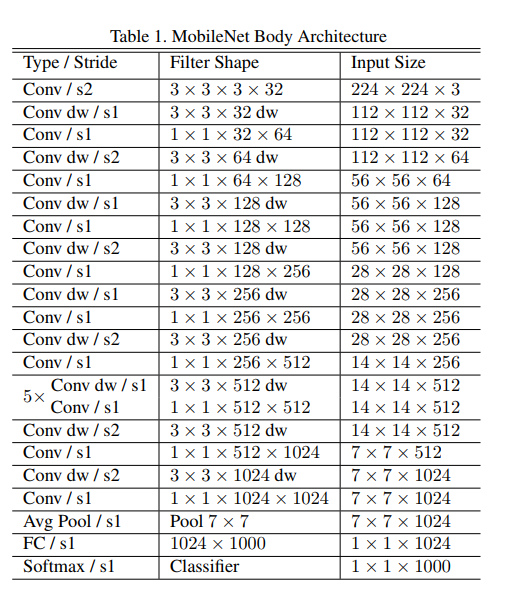

# Creating the MobileNet Model

In [18]:
# Base model for the mobilenet model
mobnet_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [8]:
image_size = (224,224)

from keras import layers
from keras import models

num_classes = 10

model1 = Sequential()
keras.layers.experimental.preprocessing.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]),
           
model1.add(mobnet_model) 
model1.add(GlobalAveragePooling2D())

model1.add(Dense(1024,activation=('relu')))
model1.add(Dense(512,activation=('relu'))) 
model1.add(Dense(256,activation=('relu'))) 
model1.add(Dropout(0.5))
model1.add(Dense(128,activation=('relu')))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation=('softmax')))


model1.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])
# Creating the model and compiling it
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# a summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

## Training the model

In [9]:
# training the model for 20 epochs
history = model1.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test))

2022-03-01 04:38:32.728028: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-01 04:38:36.089021: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 15s 18ms/step - loss: 1.7091 - accuracy: 0.4133 - val_loss: 1.3198 - val_accuracy: 0.5694
Epoch 2/15
313/313 [==============================] - 5s 17ms/step - loss: 1.1579 - accuracy: 0.6405 - val_loss: 1.0302 - val_accuracy: 0.6728
Epoch 3/15
313/313 [==============================] - 5s 16ms/step - loss: 0.9945 - accuracy: 0.7011 - val_loss: 1.0475 - val_accuracy: 0.6770
Epoch 4/15
313/313 [==============================] - 5s 17ms/step - loss: 0.8897 - accuracy: 0.7352 - val_loss: 0.9581 - val_accuracy: 0.6988
Epoch 5/15
313/313 [==============================] - 5s 16ms/step - loss: 0.7938 - accuracy: 0.7610 - val_loss: 0.9720 - val_accuracy: 0.7082
Epoch 6/15
313/313 [==============================] - 5s 16ms/step - loss: 0.7309 - accuracy: 0.7840 - val_loss: 0.8209 - val_accuracy: 0.7568
Epoch 7/15
313/313 [==============================] - 5s 16ms/step - loss: 0.6737 - accuracy: 0.8051 - val_loss: 0.8495 - val_accuracy: 0.7176
Epoch 8/1

# Plotting the Accuracy and Loss

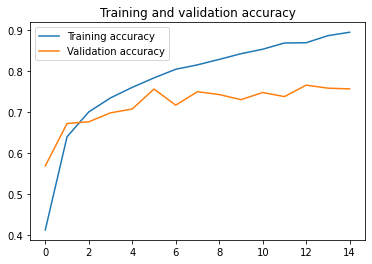

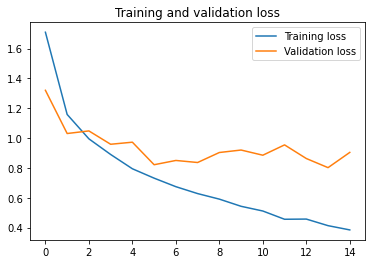

In [10]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("Accuracy for test data : ",accuracy)
print("Loss for test data : ",loss)

157/157 [==============================] - 2s 10ms/step - loss: 0.9036 - accuracy: 0.7572
Accuracy for test data :  0.7572000026702881
Loss for test data :  0.9035511612892151


# Evaluation Metrics

## Confusion Matrix

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

rounded_labels=np.argmax(y_test, axis=1)

preds = model1.predict(x_test, batch_size = 64, verbose = 1)
preds = np.argmax(preds, axis=1) # to get the indices of max value in each row
cr = confusion_matrix(rounded_labels, preds)
print("The confusion Matrix: \n",cr)

79/79 [==============================] - 1s 4ms/step
The confusion Matrix: 
 [[358   6  21   9   9   9   2   8  52  14]
 [ 13 415   1   2   1   3   2   2   9  57]
 [ 41   1 369  10  32  28   9   9   9   4]
 [  5   1  41 249  34 116   9   8  16  18]
 [  7   1  34   7 417  20   5  11   5   0]
 [  6   1  19  60  31 344   4  14   5   4]
 [  2   1  38  16  40  20 354   4  14   2]
 [  5   1  13   8  51  41   1 367   4   4]
 [ 10   6   6   1   0   1   0   0 468  12]
 [  9  16   2   3   3   2   2   4  27 445]]


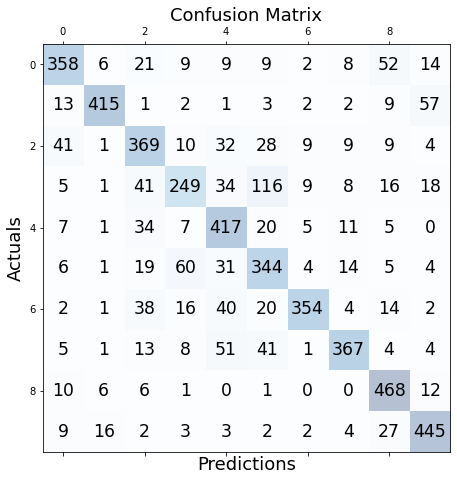

In [13]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
        ax.text(x=j, y=i,s=cr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)    
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Classificaton Report

In [14]:
print(classification_report(rounded_labels, preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       488
           1       0.92      0.82      0.87       505
           2       0.68      0.72      0.70       512
           3       0.68      0.50      0.58       497
           4       0.67      0.82      0.74       507
           5       0.59      0.70      0.64       488
           6       0.91      0.72      0.81       491
           7       0.86      0.74      0.80       495
           8       0.77      0.93      0.84       504
           9       0.79      0.87      0.83       513

    accuracy                           0.76      5000
   macro avg       0.77      0.76      0.76      5000
weighted avg       0.77      0.76      0.76      5000



## Precision

In [15]:
# Class-wise Precision
acc={}
l=len(cr)
for i in range(0,l):
    acc[i]=cr[i][i]/sum(cr[:, i])
print("Precision: \n",acc)
#here we can see most of the class 1 is classified correctly than other classes

Precision: 
 {0: 0.7850877192982456, 1: 0.9242761692650334, 2: 0.6783088235294118, 3: 0.6821917808219178, 4: 0.6747572815533981, 5: 0.589041095890411, 6: 0.9123711340206185, 7: 0.8594847775175644, 8: 0.7684729064039408, 9: 0.7946428571428571}


## Recall

In [16]:
# Recall
Recall ={}    
for i in range(0,l):
     Recall[i]= cr[i][i]/sum(cr[i,:])
print("Recall: \n",Recall)

Recall: 
 {0: 0.7336065573770492, 1: 0.8217821782178217, 2: 0.720703125, 3: 0.5010060362173038, 4: 0.8224852071005917, 5: 0.7049180327868853, 6: 0.7209775967413442, 7: 0.7414141414141414, 8: 0.9285714285714286, 9: 0.8674463937621832}


## F1-Score

In [17]:
f1 ={}    
for i in range(0,l):
     f1[i] = 2 * (cr[i,i] / sum(cr[:,i])) * (cr[i,i]/sum(cr[i,:])) / ((cr[i,i] / sum(cr[:,i])) + (cr[i,i]/sum(cr[i,:])))
print("F1- score: \n",f1)

F1- score: 
 {0: 0.7584745762711865, 1: 0.870020964360587, 2: 0.6988636363636365, 3: 0.5777262180974477, 4: 0.7413333333333334, 5: 0.6417910447761194, 6: 0.8054607508532424, 7: 0.7960954446854663, 8: 0.8409703504043127, 9: 0.8294501397949674}
